<a href="https://colab.research.google.com/github/DianaDoosti/Introduction_to_AI_2025/blob/main/AI4032_MP2/MP2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 20.3MB/s]
Archive:  PersianData.zip
replace 1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

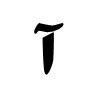

In [11]:
from IPython.display import display
from PIL import Image, ImageDraw
display(Image.open('1.jpg'))


In [12]:
from PIL import Image, ImageDraw
import random
import numpy as np

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    return np.asarray(binary_representation)

binary_array=convertImageToBinary('1.jpg')

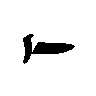

In [13]:
import numpy as np
from PIL import Image

def binary_numpy_to_image(binary_array: np.ndarray, shape=None, column_major=False) -> Image.Image:
    if binary_array.ndim == 1:
        if shape is None:
            raise ValueError()
        binary_array = binary_array.reshape(shape)

    pixel_array = np.where(binary_array == -1, 255, 0).astype(np.uint8)

    image = Image.fromarray(pixel_array, mode='L')

    return image

image = binary_numpy_to_image(binary_array, shape=(96, 96))

display(image)

Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


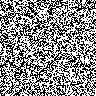

In [14]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 1500

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()
display(Image.open('noisy1.jpg'))

In [15]:
import numpy as np
def compare(noisy_image):
    im = []
    im.append(convertImageToBinary('1.jpg'))
    im.append(convertImageToBinary('2.jpg'))
    im.append(convertImageToBinary('3.jpg'))
    im.append(convertImageToBinary('4.jpg'))
    im.append(convertImageToBinary('5.jpg'))
    difference = []
    for i in range(5):
        difference.append(np.sum(noisy_image != im[i]))
    min_diff = 1e9
    min_num = 0
    for i in range(5):
        if difference[i] < min_diff:
            min_diff = difference[i]
            min_num = i
    return min_num


<class 'numpy.ndarray'>


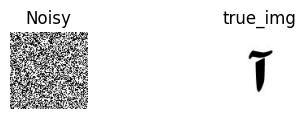

<class 'numpy.ndarray'>


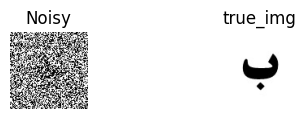

<class 'numpy.ndarray'>


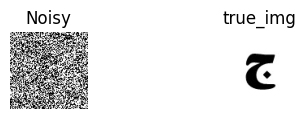

<class 'numpy.ndarray'>


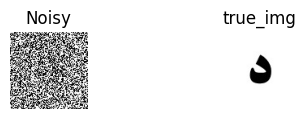

<class 'numpy.ndarray'>


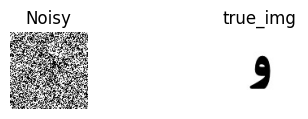

In [16]:
import matplotlib.pyplot as plt

original_images = []
n_images = []
for i in range(5):
    path = f"{i+1}.jpg"
    original_images.append(np.array(Image.open(path).convert('RGB')))
    path = f"noisy{i+1}.jpg"
    n_images.append(np.array(Image.open(path).convert('RGB')))


for i in range(5):
    print(type(convertImageToBinary(f"noisy{i+1}.jpg")))
    ind = compare(convertImageToBinary(f"noisy{i+1}.jpg"))
    plt.figure(figsize=(5, 1))
    plt.subplot(1, 2, 1)
    plt.title("Noisy")
    plt.imshow(n_images[i])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("true_img")
    plt.imshow(original_images[ind])
    plt.axis('off')
    plt.show()


missing of 1.jpg saved as miss1.jpg
missing of 2.jpg saved as miss2.jpg
missing of 3.jpg saved as miss3.jpg
missing of 4.jpg saved as miss4.jpg
missing of 5.jpg saved as miss5.jpg


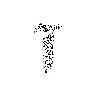

In [17]:
from PIL import Image, ImageDraw
import random

def createmissingImages():
    image_files = [
        "1.jpg",
        "2.jpg",
        "3.jpg",
        "4.jpg",
        "5.jpg"
    ]

    for idx, img_file in enumerate(image_files, start=1):
        output_file = f"miss{idx}.jpg"
        applymissToImage(img_file, output_file)
        print(f"missing of {img_file} saved as {output_file}")

def applymissToImage(input_file, output_file):
    img = Image.open(input_file)
    pen = ImageDraw.Draw(img)
    w, h = img.size
    pixels = img.load()

    missing_fac = 700

    for x in range(w):
        for y in range(h):
            rand_val = random.randint(0, 1000)

            r, g, b = pixels[x, y]

            # اگر عدد تصادفی کمتر از آستانه بود، پیکسل سفید شود
            if rand_val < missing_fac:
                r, g, b = 255, 255, 255

            # به‌روزرسانی مقدار پیکسل
            pen.point((x, y), (r, g, b))

    # ذخیره نتیجه در فایل خروجی
    img.save(output_file, "JPEG")
    # حذف ابزار رسم برای آزادسازی حافظه
    del pen

createmissingImages()
display(Image.open('miss1.jpg'))

<class 'numpy.ndarray'>


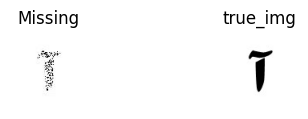

<class 'numpy.ndarray'>


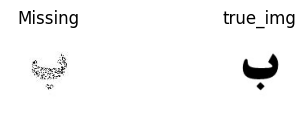

<class 'numpy.ndarray'>


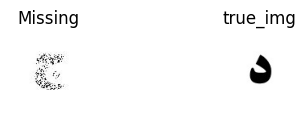

<class 'numpy.ndarray'>


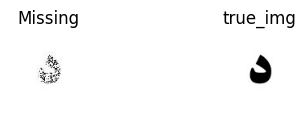

<class 'numpy.ndarray'>


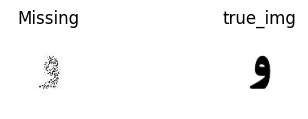

In [18]:
import matplotlib.pyplot as plt

original_images = []
m_images = []
for i in range(5):
    path = f"{i+1}.jpg"
    original_images.append(np.array(Image.open(path).convert('RGB')))
    path = f"miss{i+1}.jpg"
    m_images.append(np.array(Image.open(path).convert('RGB')))


for i in range(5):
    print(type(convertImageToBinary(f"miss{i+1}.jpg")))
    ind = compare(convertImageToBinary(f"miss{i+1}.jpg"))
    plt.figure(figsize=(5, 1))
    plt.subplot(1, 2, 1)
    plt.title("Missing")
    plt.imshow(m_images[i])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("true_img")
    plt.imshow(original_images[ind])
    plt.axis('off')
    plt.show()
